## Observations and Insights 

1. According to the line chart of below of the tumor size of Mouse #u364, Capomulin seems to be effective. 
2. Not all of the treatments were effective. 
3. Capomulin and Ramicane had by far the lowest mean and median tumor size compared to other drug regimens. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
raw_study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(raw_study_results, how="right")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(f"The total number of mice in the study is {combined_df['Mouse ID'].nunique()}")


The total number of mice in the study is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["Duplicate"] = combined_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicates = combined_df.loc[combined_df["Duplicate"]==True]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_rows = combined_df.loc[combined_df["Mouse ID"] == "g989"]
remove_rows
combined_df.drop(remove_rows.index, axis=0, inplace=True)
combined_df.drop(columns="Duplicate", inplace=True)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(combined_df["Mouse ID"].nunique())

#drops duplicate data
mouse_metadata.drop(mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989"].index, inplace=True)

mouse_metadata

248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#TODO: Give title, reindex
mean_all = combined_df["Tumor Volume (mm3)"].mean()
median_all = combined_df["Tumor Volume (mm3)"].median()
std_all = combined_df["Tumor Volume (mm3)"].std()
sem_all = combined_df["Tumor Volume (mm3)"].sem()
var_all = combined_df["Tumor Volume (mm3)"].var()
stats_tum_vol = pd.DataFrame({"Statistics": ["mean", "median", "variance", "standard deviation", "SEM"], "Values":[mean_all, median_all, var_all, std_all, sem_all]})

print(stats_tum_vol)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group_by = combined_df.groupby(["Drug Regimen"])
groupby_tumor_mean = drug_group_by["Tumor Volume (mm3)"].mean()
groupby_tumor_median = drug_group_by["Tumor Volume (mm3)"].median()
groupby_tumor_std = drug_group_by["Tumor Volume (mm3)"].std()
groupby_tumor_sem = drug_group_by["Tumor Volume (mm3)"].sem()
groupby_tumor_var = drug_group_by["Tumor Volume (mm3)"].var()

groupby_drug_stats = pd.DataFrame(groupby_tumor_mean)
groupby_drug_stats.columns = ["Mean"]
groupby_drug_stats["Median"] = groupby_tumor_median
groupby_drug_stats["Variance"] = groupby_tumor_var
groupby_drug_stats["St. Dev."] = groupby_tumor_std
groupby_drug_stats["SEM"] = groupby_tumor_sem

print(groupby_drug_stats)


           Statistics     Values
0                mean  50.435293
1              median  48.933454
2            variance  79.462907
3  standard deviation   8.914197
4                 SEM   0.205591
                   Mean     Median   Variance  St. Dev.       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_by["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

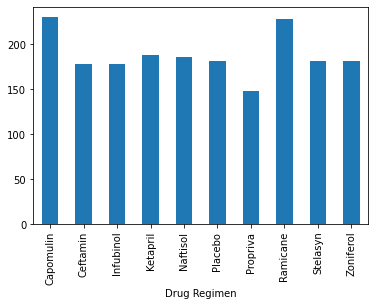

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_group_by["Mouse ID"].count().plot(kind="bar")

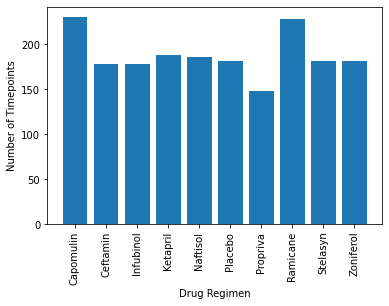

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = sorted(combined_df["Drug Regimen"].unique())
drug_count = [combined_df["Mouse ID"].loc[combined_df["Drug Regimen"] == drug].count() for drug in drugs]

plt.bar(drugs, drug_count)
plt.xticks(drugs, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.plot()
plt.show()

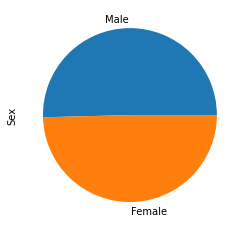

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata["Sex"].value_counts().plot(kind='pie')

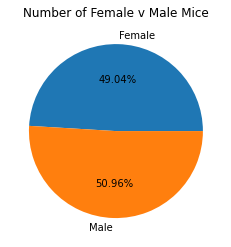

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#TODO: simple pie chart with pyplot
num_of_females = combined_df["Sex"].loc[combined_df["Sex"]=="Female"].count()
num_of_males = combined_df["Sex"].loc[combined_df["Sex"]=="Male"].count()
plt.pie([num_of_females, num_of_males], labels=["Female", "Male"], autopct='%1.2f%%')
plt.title("Number of Female v Male Mice")
plt.plot()
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_metadata["Final Tumor Size (mm3)"] = ""
for mouse in combined_df["Mouse ID"].unique():
    last_timepoint = max(combined_df["Timepoint"].loc[combined_df["Mouse ID"] == mouse])
    final_tumor_size = combined_df["Tumor Volume (mm3)"].loc[
        (combined_df["Timepoint"] == last_timepoint) & (combined_df["Mouse ID"] == mouse)]
    mouse_metadata.loc[mouse_metadata["Mouse ID"]==mouse, ["Final Tumor Size (mm3)"]] = float(final_tumor_size)

mouse_metadata
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


78.56701362

In [45]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_metadata["Final Tumor Size (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes
box_plot_df = pd.DataFrame(mouse_metadata.loc[mouse_metadata["Drug Regimen"].isin(four_drugs)])
box_plot_df

# Determine outliers using upper and lower bounds
#both empty - no outliers for ALL data
high_outliers = mouse_metadata["Mouse ID"].loc[mouse_metadata["Final Tumor Size (mm3)"] > upper_bound]
low_outliers = mouse_metadata["Mouse ID"].loc[mouse_metadata["Final Tumor Size (mm3)"] < lower_bound]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Size (mm3)
0,k403,Ramicane,Male,21,16,22.0501
1,s185,Capomulin,Female,3,17,23.3436
2,x401,Capomulin,Female,16,15,28.484
3,m601,Capomulin,Male,22,17,28.431
4,g791,Ramicane,Male,11,16,29.1285
...,...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29,61.3867
237,y163,Infubinol,Female,17,27,67.6856
241,y769,Ceftamin,Female,6,27,68.5947
242,y865,Ceftamin,Male,23,26,64.7298


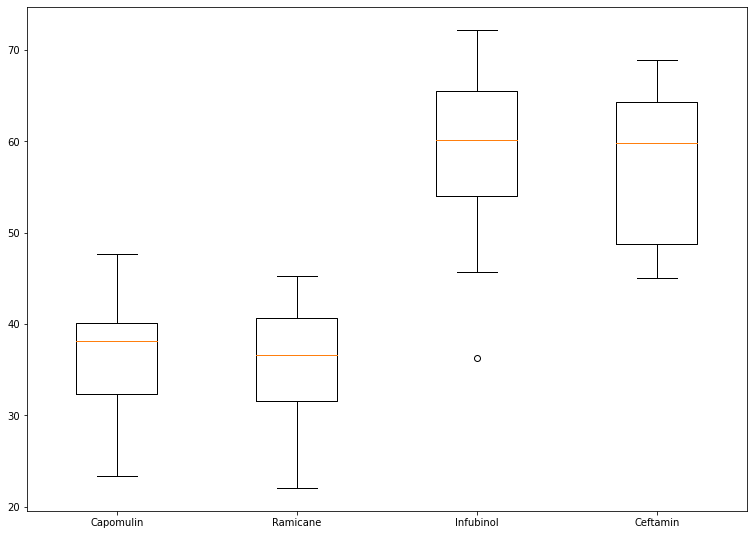

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [mouse_metadata["Final Tumor Size (mm3)"].loc[mouse_metadata["Drug Regimen"] == drug] for drug in four_drugs]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(four_drugs)
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

## Line and Scatter Plots

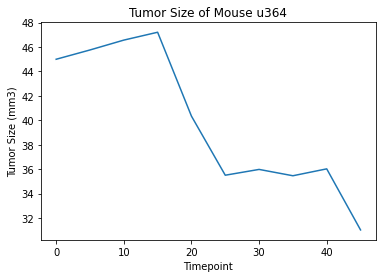

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
y_axis = combined_df["Tumor Volume (mm3)"].loc[combined_df["Mouse ID"] == "u364"]
x_axis = combined_df["Timepoint"].loc[combined_df["Mouse ID"] == "u364"]
plt.title("Tumor Size of Mouse u364")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size (mm3)")
plt.plot(x_axis, y_axis)
plt.show()

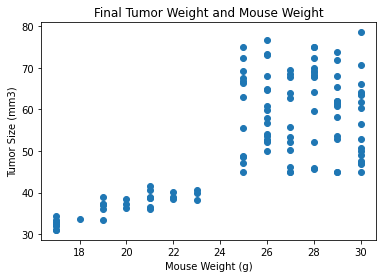

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# I'm using Final Tumor Size instead of the average
x_axis = mouse_metadata["Weight (g)"].loc[combined_df["Drug Regimen"] == "Capomulin"]
y_axis = mouse_metadata["Final Tumor Size (mm3)"].loc[combined_df["Drug Regimen"] == "Capomulin"]
plt.scatter(x_axis, y_axis)
plt.title("Final Tumor Weight and Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.show()

## Correlation and Regression

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.7
